In [7]:
# import modules
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import scipy
from scipy.stats import pearsonr
import pandas as pd
from seaborn import regplot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
  
# import file with data
data = pd.read_csv("gapminder\gapminder_full.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1704 non-null   object 
 1   year        1704 non-null   int64  
 2   population  1704 non-null   int64  
 3   continent   1704 non-null   object 
 4   life_exp    1704 non-null   float64
 5   gdp_cap     1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


                year  population  life_exp   gdp_cap
year        1.000000    0.082308  0.435611  0.227318
population  0.082308    1.000000  0.064955 -0.025600
life_exp    0.435611    0.064955  1.000000  0.583706
gdp_cap     0.227318   -0.025600  0.583706  1.000000


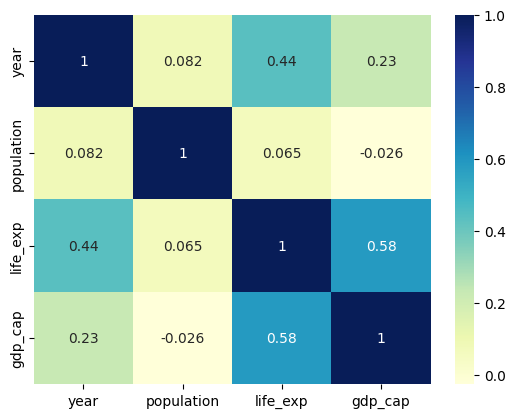

In [8]:
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(data.corr())
  
# plotting correlation heatmap
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

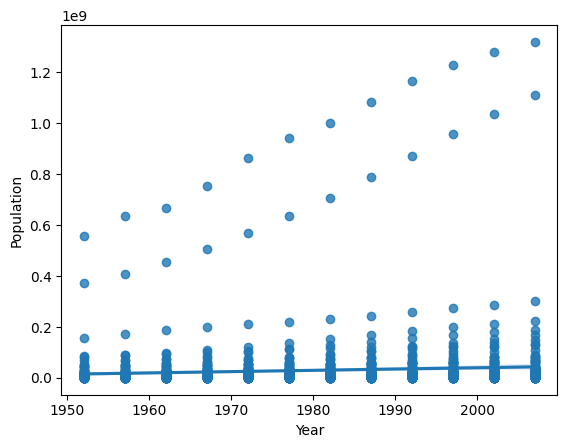

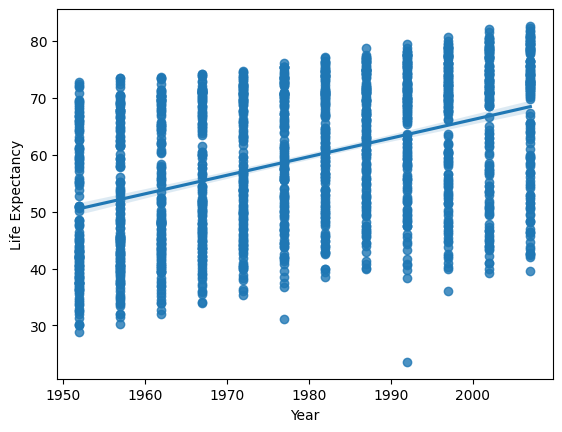

Pearson Correlation between Year and Population
PearsonRResult(statistic=0.08230807783830926, pvalue=0.0006716006496142521)
Pearson Correlation between Year and Life Expectancy
PearsonRResult(statistic=0.4356112240540735, pvalue=7.54679462559958e-80)


In [9]:
def plt_regression(x, y, data, label_1, label_2):
    reg_plot = regplot(x=x, y=y, fit_reg=True, data=data)
    plt.xlabel(label_1)
    plt.ylabel(label_2)
    plt.show()

plt_regression('year', 'population', data, 'Year', 'Population')
plt_regression('year', 'life_exp', data, 'Year', 'Life Expectancy')

print('Pearson Correlation between Year and Population')
print(pearsonr(data['year'], data['population']))

print('Pearson Correlation between Year and Life Expectancy')
print(pearsonr(data['year'], data['life_exp']))

In [14]:
def bin(dataframe, cols):
	# Create new columns that store the binned data
    for col in cols:
        new_col_name = "{}_bins".format(col)
        dataframe[new_col_name] = pd.qcut(dataframe[col], 10)

data1 = data.copy()
cols = ['year', 'population']
norm_cols = ['population', 'gdp_cap', 'life_exp']
# This creates new columns filled with the binned column data
bin(data, cols)
bin(data1, norm_cols)

anova_df = data[['year_bins', 'population']].dropna()

relate_df = data[['year_bins', 'population']]

anova = smf.ols(formula='population ~ C(year_bins)', data = anova_df).fit()

print(anova.summary())

# We may also want to check the mean and standard deviation for the groups
mean = relate_df.groupby("year_bins").mean()
sd = relate_df.groupby("year_bins").std()
print(mean)
print(sd)

                            OLS Regression Results                            
Dep. Variable:             population   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.282
Date:                Thu, 15 Sep 2022   Prob (F-statistic):              0.242
Time:                        11:21:35   Log-Likelihood:                -33902.
No. Observations:                1704   AIC:                         6.782e+04
Df Residuals:                    1694   BIC:                         6.788e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------

In [16]:
def chi_sq_test(table):

    print("Results for:")
    print(str(table))

    # Get column percentages
    col_sum = table.sum(axis=0)
    col_percents = table/col_sum
    print(col_percents)

    chi_square = scipy.stats.chi2_contingency(table)
    print("Chi-square value, p-value, expected_counts")
    print(chi_square)

    print()

    
# Get table of observed counts
count_table = pd.crosstab(data['population_bins'], data['year_bins'])
print(count_table)

print("Initial Chi-square:")
chi_sq_test(count_table)
print(" ")

year_bins                   (1951.999, 1957.0]  (1957.0, 1962.0]  \
population_bins                                                    
(60010.999, 946367.1]                       47                20   
(946367.1, 2060997.4]                       37                18   
(2060997.4, 3417857.8]                      41                16   
(3417857.8, 4740095.6]                      28                18   
(4740095.6, 7023595.5]                      26                 9   
(7023595.5, 9711965.6]                      34                17   
(9711965.6, 14311981.2]                     12                13   
(14311981.2, 25757626.2]                    25                 9   
(25757626.2, 54801369.5]                    20                14   
(54801369.5, 1318683096.0]                  14                 8   

year_bins                   (1962.0, 1967.0]  (1967.0, 1972.0]  \
population_bins                                                  
(60010.999, 946367.1]                     17       